Total rice grains counted: 818


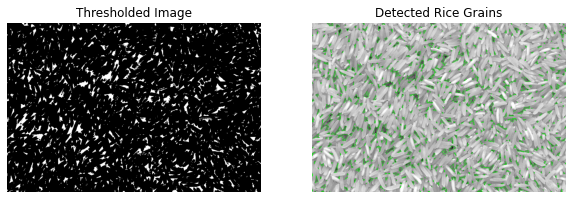

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread("rice.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize image to speed up processing (reducing by 75%)
scale_percent = 25  # Reduce the image size to 25% of original
width = image.shape[1] * scale_percent // 100
height = image.shape[0] * scale_percent // 100
image = cv2.resize(image, (width, height), interpolation=cv2.INTER_NEAREST)

# Apply a fast threshold (fixed value instead of Otsu's)
_, thresh = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

# Apply quick morphological opening to clean noise
kernel = np.ones((2, 2), np.uint8)  
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours (fastest method)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original resized image
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 1)

# Print total rice grain count
print(f"Total rice grains counted: {len(contours)}")

# Display images inline
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(thresh, cmap="gray")
axes[0].set_title("Thresholded Image")
axes[0].axis("off")

axes[1].imshow(output)
axes[1].set_title("Detected Rice Grains")
axes[1].axis("off")

plt.show()
